In [17]:
# Importáljuk a szükséges modulokat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as mysql
from matplotlib import style
%matplotlib inline

In [7]:
# Csatlakozzunk az adtbázishoz:
db = mysql.connect(
        host = 'localhost',
        user = 'ax07998',
        password = 'Abcd1234.',
        database = 'hu_monitor'
        )
print(db)

In [22]:
# Lássuk a queryt:
qry ="""SELECT UPPER(kezdAx)AS 'usr',kicsAllapot,kicsomKezdDat,kicsomVegDat,
time_to_sec(idotartam)/60 AS 'ido_perc',SOROK,totveight,totvol/1000 As 'vol',totDara
 FROM hu_monitor.kicsomdata
WHERE kezdAx = vegezAX AND idotartam > 0 AND idotartam < '05:00' AND kicsAllapot LIKE 'KICSOM V%';"""
# Olvassuk ki az adataokat egy dataframe-be
df = pd.read_sql(qry,db)

In [23]:
# Az első ellenőrzéshez elég a shape tuple-t használni.
# Ez memutatja, hogy hány sorunk, és oszlopunk van.
df.shape

(8290, 9)

In [13]:
# Nézzünk bele a dataframbe:
df.head()

,usr,kicsAllapot,kicsomKezdDat,kicsomVegDat,ido_perc,SOROK,totveight,vol,totDara
0,A141001,KICSOM VÉGE KISANY URGENT,2020-04-24 12:27:16,2020-04-24 12:11:34,15.7000,31,82.007,1656.262672,70
1,A141001,KICSOM VÉGE KISANY URGENT,2020-04-24 12:57:49,2020-04-24 12:28:30,29.3167,51,57.239,222.246145,146
2,A141001,KICSOM VÉGE KISANY URGENT,2020-04-24 13:13:24,2020-04-24 13:00:52,12.5333,16,42.188,234.003520,28
3,A141001,KICSOM VÉGE KISANY URGENT,2020-04-24 13:25:35,2020-04-24 13:13:31,12.0667,14,53.676,297.670664,18
4,A141001,KICSOM VÉGE KISANY URGENT,2020-04-24 14:00:13,2020-04-24 13:27:37,32.6000,72,28.120,96.131079,264


In [14]:
# Úgy tűnik minden OK:
# Nézzük meg az adattípusokat:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8295 entries, 0 to 8294
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   usr            8295 non-null   object        
 1   kicsAllapot    8295 non-null   object        
 2   kicsomKezdDat  8295 non-null   datetime64[ns]
 3   kicsomVegDat   8295 non-null   datetime64[ns]
 4   ido_perc       8295 non-null   float64       
 5   SOROK          8295 non-null   int64         
 6   totveight      8295 non-null   float64       
 7   vol            8295 non-null   float64       
 8   totDara        8295 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 583.4+ KB


In [15]:
# Az adattípusok nagyjából rendben vannak, mert csak az első 2 object, ezekről tudjuk, h valóban szövegek.
# Lássuk a numerikus addatokra vonatkozó alapstatisztikát:
df.describe()

,ido_perc,SOROK,totveight,vol,totDara
count,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000
mean,9.411488,14.026040,59.003363,576.839521,108.882218
std,13.717524,21.250122,108.965967,796.647440,334.593918
min,0.016700,1.000000,0.000000,0.000000,1.000000
25%,0.616700,2.000000,7.758000,62.240256,5.000000
50%,4.716700,7.000000,26.420000,228.690000,24.000000
75%,12.516700,17.000000,71.830000,841.424816,80.000000
max,266.616700,509.000000,4738.921000,9296.235000,9443.000000


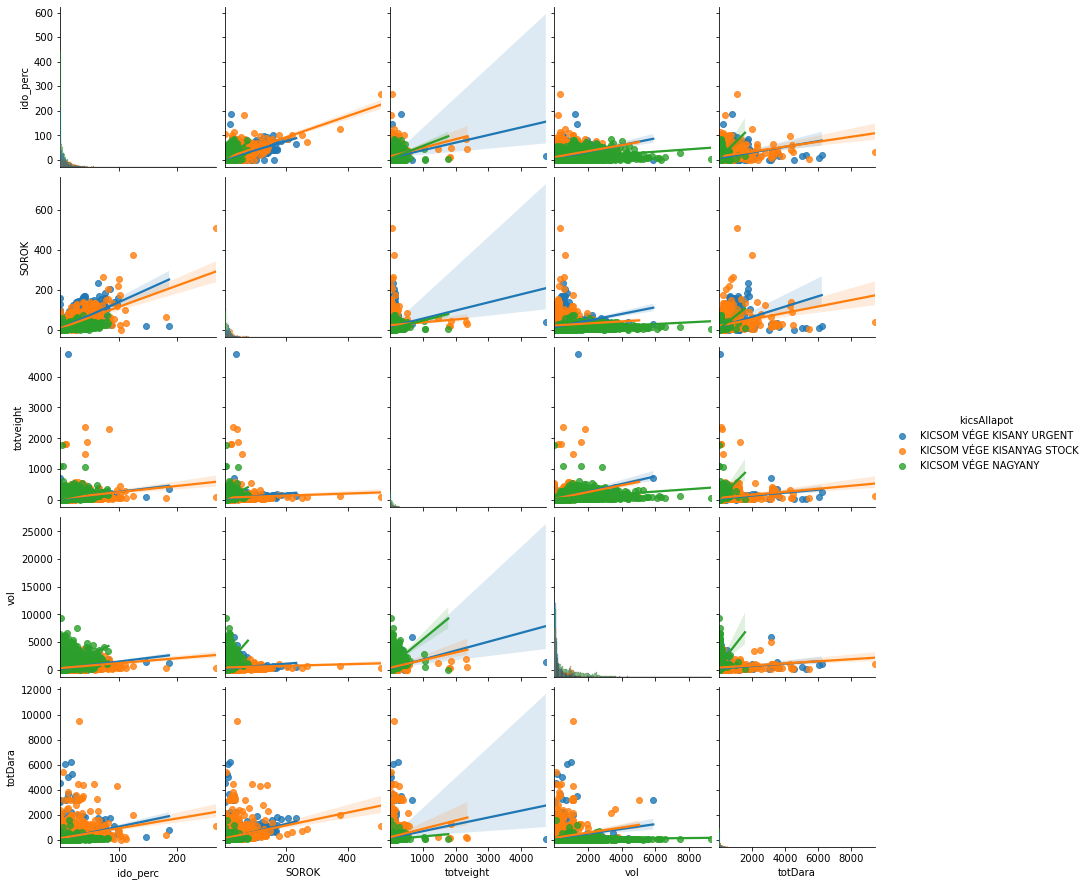

In [27]:
# Miután a fentiekből elég jól látszik, hogy igencsak szétszórt adataink vannak, lássunk egy kicsit vizuálisabb
# megközelítést:
sns.pairplot(data=df,hue='kicsAllapot',kind='reg',diag_kind='hist')

In [41]:
# Hogy lássuk ténleg milyen kusza, nézzük meg a kovaianciát, és a korrelációt:
print(df.cov())
print("==================================")
print(df.corr())

              ido_perc        SOROK     totveight            vol  \
ido_perc    188.250243   197.816047    477.347933    3175.028918   
SOROK       197.816047   451.729904    372.269034    1500.027719   
totveight   477.347933   372.269034  11879.228334   31367.005301   
vol        3175.028918  1500.027719  31367.005301  634874.287635   
totDara    1461.829487  2783.035192   5956.551732    8597.772592   

                 totDara  
ido_perc     1461.829487  
SOROK        2783.035192  
totveight    5956.551732  
vol          8597.772592  
totDara    112017.016272  
           ido_perc     SOROK  totveight       vol   totDara
ido_perc   1.000000  0.678351   0.319208  0.290426  0.318337
SOROK      0.678351  1.000000   0.160703  0.088576  0.391235
totveight  0.319208  0.160703   1.000000  0.361189  0.163290
vol        0.290426  0.088576   0.361189  1.000000  0.032240
totDara    0.318337  0.391235   0.163290  0.032240  1.000000


<AxesSubplot:>

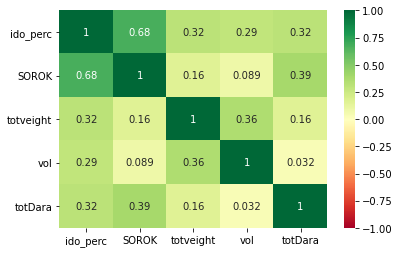

In [46]:
# Hát talán itt is többet segít egy kis vizualitás
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='RdYlGn',annot=True)

In [33]:
# Ez is elég kusza, szedjük szét kategóriákra!
df_ks = df.loc[df['kicsAllapot'] == 'KICSOM VÉGE KISANYAG STOCK']
print('SHAPE:',df_ks.shape)
print('=============================================')
df_ks.head()

SHAPE: (1979, 9)


,usr,kicsAllapot,kicsomKezdDat,kicsomVegDat,ido_perc,SOROK,totveight,vol,totDara
5,A141001,KICSOM VÉGE KISANYAG STOCK,2020-07-07 16:42:02,2020-07-07 14:59:36,102.4333,176,160.463,1097.812992,262
6,A630083,KICSOM VÉGE KISANYAG STOCK,2020-06-04 14:50:12,2020-06-04 14:14:56,35.2667,10,42.240,401.376000,120
63,AX03751,KICSOM VÉGE KISANYAG STOCK,2020-06-05 13:16:30,2020-06-05 12:51:39,24.8500,41,68.973,605.469910,102
64,AX03751,KICSOM VÉGE KISANYAG STOCK,2020-06-05 13:41:21,2020-06-05 13:23:08,18.2167,22,21.940,297.199013,54
65,AX03751,KICSOM VÉGE KISANYAG STOCK,2020-06-24 16:28:09,2020-06-24 16:27:30,0.6500,1,1.155,3.230760,10


In [37]:
df['kicsAllapot'].unique()
# Úgy tűnik, OK, lássuk a másik két kategóriát is:
# A biztonság kedvéért kérjük le az egyedi értékeket a 'kicsAllapot' oszlopra
df['kicsAllapot'].unique()
df_ku = df.loc[df['kicsAllapot'] == 'KICSOM VÉGE KISANY URGENT']
df_na = df.loc[df['kicsAllapot'] == 'KICSOM VÉGE NAGYANY']